<a href="https://colab.research.google.com/github/alexnaoki/UFMS-heros/blob/main/02_Timeseries_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading file

In [ ]:
time_series_data = "https://raw.githubusercontent.com/alexnaoki/UFMS-heros/main/data/timeseries_data_fulloutput.csv"

In [ ]:
ep_columns =  ['date','time',  'H', 'qc_H', 'LE', 'qc_LE','sonic_temperature', 'air_temperature', 'air_pressure', 'air_density',
               'ET', 'e', 'es', 'RH', 'VPD','Tdew', 'u_unrot', 'v_unrot', 'w_unrot', 'u_rot', 'v_rot', 'w_rot', 'wind_speed',
               'max_wind_speed', 'wind_dir', 'u*', '(z-d)/L',  'un_H', 'H_scf', 'un_LE', 'LE_scf','u_var', 'v_var', 'w_var', 'ts_var','H_strg','LE_strg']

In [ ]:
df = pd.read_csv(time_series_data, 
                 skiprows=[0,2],
                 na_values=-9999,
                 parse_dates={'TIMESTAMP': ['date','time']},
                 usecols=ep_columns)

## 2. Checking data

In [ ]:
df.columns

Index(['TIMESTAMP', 'H', 'qc_H', 'LE', 'qc_LE', 'H_strg', 'LE_strg',
       'sonic_temperature', 'air_temperature', 'air_pressure', 'air_density',
       'ET', 'e', 'es', 'RH', 'VPD', 'Tdew', 'u_unrot', 'v_unrot', 'w_unrot',
       'u_rot', 'v_rot', 'w_rot', 'wind_speed', 'max_wind_speed', 'wind_dir',
       'u*', '(z-d)/L', 'un_H', 'H_scf', 'un_LE', 'LE_scf', 'u_var', 'v_var',
       'w_var', 'ts_var'],
      dtype='object')

In [ ]:
df.dtypes

TIMESTAMP            datetime64[ns]
H                           float64
qc_H                          int64
LE                          float64
qc_LE                       float64
H_strg                      float64
LE_strg                     float64
sonic_temperature           float64
air_temperature             float64
air_pressure                float64
air_density                 float64
ET                          float64
e                           float64
es                          float64
RH                          float64
VPD                         float64
Tdew                        float64
u_unrot                     float64
v_unrot                     float64
w_unrot                     float64
u_rot                       float64
v_rot                       float64
w_rot                       float64
wind_speed                  float64
max_wind_speed              float64
wind_dir                    float64
u*                          float64
(z-d)/L                     

## 3. Understanding Datetime in Pandas

**dtype: datetime64 [ns]**

In [ ]:
df['TIMESTAMP']

0      2018-10-05 00:30:00
1      2018-10-05 01:00:00
2      2018-10-05 01:30:00
3      2018-10-05 02:00:00
4      2018-10-05 02:30:00
               ...        
4201   2018-12-31 22:00:00
4202   2018-12-31 22:30:00
4203   2018-12-31 23:00:00
4204   2018-12-31 23:30:00
4205   2019-01-01 00:00:00
Name: TIMESTAMP, Length: 4206, dtype: datetime64[ns]

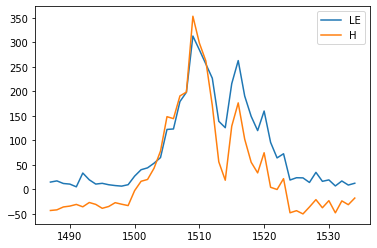

In [ ]:
df.loc[
       (df['TIMESTAMP'].dt.month==11)&
       (df['TIMESTAMP'].dt.day==5), ['LE', 'H']
].plot()

In [ ]:
df['acceptance'] = np.where(df['wind_dir']>200, True, False)

In [ ]:
df['acceptance'].value_counts()

True     2979
False    1227
Name: acceptance, dtype: int64

## 4. Resampling data

DATAFRAME**.resample()**
> Resampler OBJECT

In [ ]:
df_time = df.set_index('TIMESTAMP')

In [ ]:
# Object
df_time.resample('1d')

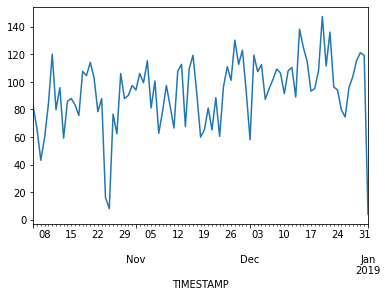

In [ ]:
df_time.resample('1d').mean()['LE'].plot()

## 5. Grouping by 

DATAFRAME.**groupby()**
> Groupby OBJECT

In [ ]:
df.groupby('acceptance')

In [ ]:
df.groupby(by='acceptance').sum()

,H,qc_H,LE,qc_LE,H_strg,LE_strg,sonic_temperature,air_temperature,air_pressure,air_density,...,u*,(z-d)/L,un_H,H_scf,un_LE,LE_scf,u_var,v_var,w_var,ts_var
acceptance,,,,,,,,,,,,,,,,,,,,,
False,69102.227983,340,166778.592481,376.0,-1157.387299,-515.359369,368749.364,366050.995,113427097.8,1315.16606,...,446.776606,9.998725,77484.962487,1258.96803,152393.147650,1260.20252,1440.467239,1247.708009,315.734494,301.778853
True,91010.215034,920,224401.037409,1156.0,1263.342148,1180.565980,884514.465,877590.286,275905118.4,3240.02819,...,960.180403,617.474124,102074.469228,3041.85217,205287.937449,3045.91206,2807.360667,2234.855513,670.029419,513.798742


In [ ]:
df.groupby(by=['acceptance', df['TIMESTAMP'].dt.hour])['LE'].mean()

acceptance  TIMESTAMP
False       0             22.379819
            1             11.340037
            2             -6.494718
            3              8.014913
            4             12.543464
            5            -16.776321
            6             13.951942
            7             62.232871
            8            111.721433
            9            177.746784
            10           225.101093
            11           244.427130
            12           265.696378
            13           256.550305
            14           252.495929
            15           212.012435
            16           155.130524
            17            93.291276
            18            57.808459
            19            18.574850
            20            17.017024
            21            25.703809
            22             4.258005
            23            15.918876
True        0              9.122568
            1              7.771450
            2              6.945109
      

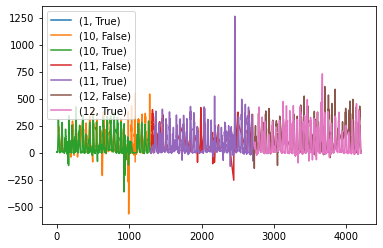

In [ ]:
df.groupby(by=[df['TIMESTAMP'].dt.month, 'acceptance'])['LE'].plot()
plt.legend()

In [ ]:
filters = (df['acceptance']==True) & (df['LE']>0)
filter_day = (df['TIMESTAMP'].dt.hour>=6) & (df['TIMESTAMP'].dt.hour<18)

df['hour'] = df['TIMESTAMP'].dt.hour

In [ ]:
filter_day.head()

0    False
1    False
2    False
3    False
4    False
Name: TIMESTAMP, dtype: bool

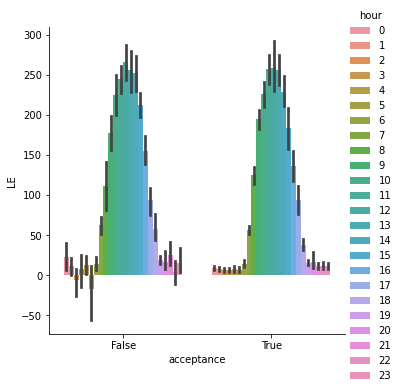

In [ ]:
sns.catplot(data=df, x='acceptance', y='LE', kind='bar', hue='hour')

In [ ]:
df.loc[filters, 'LE'].groupby(by=df['TIMESTAMP'].dt.month).mean()

TIMESTAMP
1      3.990190
10    76.513920
11    95.605542
12    92.828324
Name: LE, dtype: float64

In [ ]:
df.groupby(by=filter_day).mean()

,H,qc_H,LE,qc_LE,H_strg,LE_strg,sonic_temperature,air_temperature,air_pressure,air_density,...,un_H,H_scf,un_LE,LE_scf,u_var,v_var,w_var,ts_var,acceptance,hour
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
False,-16.530694,0.367493,13.559010,0.576628,-3.221054,-0.532207,296.269276,293.666379,92553.746616,1.090356,...,-15.550030,1.016668,14.599475,1.022728,0.730333,0.574656,0.163301,0.100824,0.792660,11.530029
True,92.406944,0.231973,172.302193,0.155745,3.256087,0.843860,299.663609,297.689382,92578.015085,1.075724,...,100.656259,1.028393,155.364378,1.030702,1.288230,1.080140,0.305103,0.286551,0.624288,11.499051


## Rolling window

In [ ]:
df_time = df.set_index('TIMESTAMP')

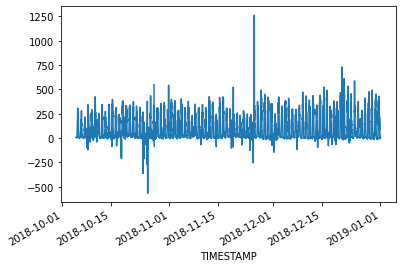

In [ ]:
df_time.rolling(1, min_periods=1).mean()['LE'].plot()